## Clean data

After we have an overall understanding about the data in the `exp-01` notebook, now we need to take a closer look and clean it

In [1]:
import os
os.chdir("..")
!pwd

/c/TungGpu/ml-it/code/sagemaker-r2


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Load data

In [3]:
DATA_DIR = Path("./data")
TMP_DIR = Path("./tmp")
DATA_CSV = DATA_DIR / "full/train.csv"

In [4]:
df = pd.read_csv(DATA_CSV)
df

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,...,764.3,-0.005,0.060303,13.383,0.819909,-0.18291,-0.12259,0.060684,17.1094,0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,...,532.5,-0.023,0.044870,14.887,1.642613,-0.19030,-0.12308,0.045252,17.0932,0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,...,651.4,-0.035,0.054069,-2.932,0.464588,-0.18631,-0.12413,0.050065,17.2080,0
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,...,603.4,-0.008,0.043571,-44.990,0.335563,-0.19257,-0.11309,0.045097,17.5977,0
4,0.891784,-0.219,1.757,-0.782,-0.268,-0.099,-0.239,9.42913,-0.067,429.280,...,417.4,-0.025,0.041588,-12.205,-0.728111,-0.18187,-0.12143,0.043112,17.2664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.028558,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,11.34900,-0.072,443.974,...,375.9,-0.051,0.049026,1.273,-0.533203,-0.18568,-0.11735,0.053982,17.1961,3
10237,-0.288804,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,12.03610,-0.072,450.603,...,389.9,-0.051,0.054744,-29.510,-0.725361,-0.21962,-0.11697,0.059700,16.9488,3
10238,0.073675,-0.249,-0.288,-1.030,-0.334,-0.073,-0.320,10.44560,-0.072,427.511,...,625.4,-0.051,0.046761,13.455,-1.775220,-0.18374,-0.11664,0.045234,16.9493,1
10239,-0.053419,-0.191,1.505,1.110,2.209,-0.062,-0.349,10.91210,-0.125,424.143,...,865.1,-0.015,0.054070,-15.422,1.265340,-0.18110,-0.12317,0.052165,16.9989,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Columns: 152 entries, 0 to target
dtypes: float64(143), int64(9)
memory usage: 11.9 MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,target
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,...,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,0.127977,-0.018351,-0.045335,-0.016402,0.074057,0.004281,-0.007069,10.162148,-0.037253,440.690561,...,671.230407,-0.021312,0.050167,-7.314472,-0.003216,-0.195913,-0.120027,0.050307,17.452579,0.047945
std,2.018572,0.597846,0.637736,0.953677,0.960843,0.749460,0.781811,1.086576,0.218479,22.920082,...,129.187281,0.158499,0.007329,19.009677,1.008505,0.016852,0.006041,0.007461,0.309245,0.348750
min,-5.480920,-0.442000,-0.647000,-2.989000,-0.517000,-0.501000,-0.585000,6.931490,-0.190000,373.688000,...,-63.900000,-0.163000,0.025462,-71.396000,-2.139501,-0.225480,-0.134270,0.021371,16.488000,0.000000
25%,-0.710242,-0.179000,-0.303000,-0.773000,-0.310000,-0.190000,-0.310000,9.364720,-0.059000,427.281000,...,593.500000,-0.039000,0.045284,-23.548000,-0.975703,-0.215400,-0.125170,0.045284,17.244000,0.000000
50%,-0.055867,-0.113000,-0.261000,-0.028000,-0.282000,-0.126000,-0.278000,10.031200,-0.051000,439.011000,...,659.900000,-0.024000,0.049835,-3.945000,0.230574,-0.188750,-0.120090,0.050065,17.453900,0.000000
75%,0.694998,-0.076000,-0.196000,0.648000,-0.239000,-0.078000,-0.239000,10.832700,-0.045000,451.337000,...,740.700000,-0.010000,0.054840,10.529000,0.875909,-0.181530,-0.114890,0.054958,17.659600,0.000000
max,57.246035,8.995000,5.757000,3.446000,9.443000,14.743000,13.556000,15.187900,5.189000,713.481000,...,1218.200000,3.838000,0.086035,28.328000,14.013760,-0.174830,-0.105990,0.109032,19.577500,4.000000


## Fill missing values

Some solutions might be:
- Drop rows: may lose too much data -> cause overfitting
- Drop columns: may lose information in features -> cause underfitting
- Replace values by column mean, median, zero, most frequent value, other estimated value, or imputation method like `MICEImputer` from sklearn, `fancyimpute` python package, etc.

The number of missing values is very small (98 values), thus we just need a simple imputation method like replacing by the mean value.

In [7]:
fill_nan = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_df = pd.DataFrame(fill_nan.fit_transform(df))
imputed_df.columns = df.columns
imputed_df.index = df.index

In [8]:
# Count NaN in df
imputed_df.isnull().sum().sum()

0

In [9]:
df = imputed_df

## Drop highly correlated features
[Reference](https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python)

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
corr_mat = df.corr()
corr_mat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
0,1.000000,0.002652,-0.010912,0.038575,0.050106,0.008386,0.002332,0.170790,0.009473,0.164587,-0.007618,0.261024,0.109955,0.021635,-0.014751,0.081649,-0.071848,-0.018244,0.470127,-0.012236,-0.073333,0.034046,-0.056044,0.095244,0.000950,0.086956,-0.012805,0.008715,0.013361,0.002111,0.009097,-0.011787,-0.035541,0.003714,0.014337,0.259601,-0.032130,0.014892,-0.005518,0.032701,-0.005409,0.000746,0.045098,-0.031787,-0.044177,0.007246,-0.013420,-0.401362,-0.123874,-0.014204,0.405458,0.055415,-0.031899,0.011842,-0.005499,-0.003057,0.135346,-0.064937,0.260047,-0.009437,-0.124923,0.018270,-0.000517,-0.076852,0.061607,0.019158,0.157882,-0.005514,0.044587,-0.006443,-0.003097,-0.006390,-0.004777,-0.372667,0.001685,-0.009968,-0.008170,0.009582,0.012381,0.261963,0.015474,0.008841,-0.032239,-0.006505,-0.042790,0.046950,-0.002244,-0.174969,-0.022197,0.018609,0.346333,0.000352,0.093999,0.011963,0.003975,0.022912,-0.006700,0.003491,0.065156,0.013625,0.063262,-0.014855,-0.001691,0.004286,-0.026421,0.002763,-0.001954,-0.008070,0.094847,0.355632,-0.025596,0.000986,-0.006715,0.016033,-0.003968,0.008903,-0.013082,0.034914,0.018140,-0.176595,-0.078473,0.010039,0.028911,0.025857,-0.023422,0.085774,0.000052,-0.065032,-0.100258,0.014720,0.006206,-0.099499,0.005359,0.120467,-0.063770,-0.010392,-0.002181,0.075143,0.000059,0.003811,0.153747,-0.003574,0.001103,-0.003026,0.156966,0.039079,0.046398,-0.000989,-0.007058,0.154031,-0.186368,0.222683
1,0.002652,1.000000,0.025079,-0.019532,0.057252,0.026692,0.009735,0.003058,-0.002971,0.077088,0.019708,-0.006213,0.032433,-0.030687,0.029051,-0.003030,0.010243,0.039391,0.000162,-0.005353,0.086362,-0.043439,0.041700,0.011799,0.004479,0.002273,0.013453,0.022535,0.035608,0.019149,-0.020100,0.014866,0.050448,0.010315,0.035213,-0.010201,0.034736,0.000913,0.040933,0.037946,0.004137,-0.015962,-0.030966,0.045787,0.046906,0.009171,0.010420,-0.029449,0.034133,0.006002,0.002827,-0.019096,0.001054,0.006761,0.001631,-0.003990,0.082802,0.013793,0.015789,-0.016817,0.033632,-0.000518,-0.003914,0.053651,-0.006231,-0.004082,-0.007478,0.009692,-0.031584,-0.009468,0.020991,-0.001044,0.021012,-0.000471,-0.002720,-0.016728,0.000617,0.003770,-0.029454,0.015825,0.001651,0.022499,-0.017103,-0.006017,-0.001890,0.016679,-0.002753,0.000514,0.017778,0.007238,-0.005625,0.001074,0.014241,-0.004830,0.031547,0.010679,0.016706,0.015292,0.049713,0.000032,0.041346,0.005079,0.006795,-0.007626,-0.003622,-0.005076,0.020943,0.014609,0.043972,0.011189,0.031871,0.012954,0.005787,0.005161,-0.006385,0.007034,-0.008378,0.027339,-0.005761,0.000195,0.027258,0.019588,0.014192,0.053650,0.019978,0.025734,0.011596,0.062676,-0.008829,0.004141,-0.003782,0.051409,-0.000185,-0.011493,0.005101,-0.009240,-0.001880,0.039648,-0.001426,0.007202,-0.002657,0.013018,-0.021932,0.023909,-0.010128,0.030099,0.017664,-0.007949,0.017670,0.002905,0.003298,0.044198
2,-0.010912,0.025079,1.000000,-0.022597,0.025652,0.062363,0.029748,-0.014507,0.004909,0.035047,0.056047,0.002963,-0.023937,-0.019292,0.094615,0.093740,-0.005871,0.022249,-0.011202,-0.011263,0.120205,-0.032006,0.215724,0.229380,-0.001059,-0.011561,-0.001423,-0.011066,0.012263,-0.003315,-0.011958,0.018685,0.086480,0.012586,0.062446,0.006341,0.026502,0.019496,-0.004791,0.083055,0.008698,-0.009672,-0.023149,0.050419,0.058175,0.030938,0.027392,-0.005971,-0.015840,-0.010837,0.005371,-0.019087,0.002590,0.022466,-0.008115,-0.004215,0.046096,0.024616,0.011626,0.003633,-0.015555,-0.012798,0.012287,0.132297,0.008795,-0.013163,0.007010,-0.010809,

In [12]:
# Select the upper triangle
abs_corr_mat = corr_mat.abs()
upper_tri = abs_corr_mat.where(np.triu(np.ones(abs_corr_mat.shape),k=1).astype(np.bool))
upper_tri

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,target
0,NaN,0.002652,0.010912,0.038575,0.050106,0.008386,0.002332,0.170790,0.009473,0.164587,0.007618,0.261024,0.109955,0.021635,0.014751,0.081649,0.071848,0.018244,0.470127,0.012236,0.073333,0.034046,0.056044,0.095244,0.000950,0.086956,0.012805,0.008715,0.013361,0.002111,0.009097,0.011787,0.035541,0.003714,0.014337,0.259601,0.032130,0.014892,0.005518,0.032701,0.005409,0.000746,0.045098,0.031787,0.044177,0.007246,0.013420,0.401362,0.123874,0.014204,0.405458,0.055415,0.031899,0.011842,0.005499,0.003057,0.135346,0.064937,0.260047,0.009437,0.124923,0.018270,0.000517,0.076852,0.061607,0.019158,0.157882,0.005514,0.044587,0.006443,0.003097,0.006390,0.004777,0.372667,0.001685,0.009968,0.008170,0.009582,0.012381,0.261963,0.015474,0.008841,0.032239,0.006505,0.042790,0.046950,0.002244,0.174969,0.022197,0.018609,0.346333,0.000352,0.093999,0.011963,0.003975,0.022912,0.006700,0.003491,0.065156,0.013625,0.063262,0.014855,0.001691,0.004286,0.026421,0.002763,0.001954,0.008070,0.094847,0.355632,0.025596,0.000986,0.006715,0.016033,0.003968,0.008903,0.013082,0.034914,0.018140,0.176595,0.078473,0.010039,0.028911,0.025857,0.023422,0.085774,0.000052,0.065032,0.100258,0.014720,0.006206,0.099499,0.005359,0.120467,0.063770,0.010392,0.002181,0.075143,0.000059,0.003811,0.153747,0.003574,0.001103,0.003026,0.156966,0.039079,0.046398,0.000989,0.007058,0.154031,0.186368,0.222683
1,NaN,NaN,0.025079,0.019532,0.057252,0.026692,0.009735,0.003058,0.002971,0.077088,0.019708,0.006213,0.032433,0.030687,0.029051,0.003030,0.010243,0.039391,0.000162,0.005353,0.086362,0.043439,0.041700,0.011799,0.004479,0.002273,0.013453,0.022535,0.035608,0.019149,0.020100,0.014866,0.050448,0.010315,0.035213,0.010201,0.034736,0.000913,0.040933,0.037946,0.004137,0.015962,0.030966,0.045787,0.046906,0.009171,0.010420,0.029449,0.034133,0.006002,0.002827,0.019096,0.001054,0.006761,0.001631,0.003990,0.082802,0.013793,0.015789,0.016817,0.033632,0.000518,0.003914,0.053651,0.006231,0.004082,0.007478,0.009692,0.031584,0.009468,0.020991,0.001044,0.021012,0.000471,0.002720,0.016728,0.000617,0.003770,0.029454,0.015825,0.001651,0.022499,0.017103,0.006017,0.001890,0.016679,0.002753,0.000514,0.017778,0.007238,0.005625,0.001074,0.014241,0.004830,0.031547,0.010679,0.016706,0.015292,0.049713,0.000032,0.041346,0.005079,0.006795,0.007626,0.003622,0.005076,0.020943,0.014609,0.043972,0.011189,0.031871,0.012954,0.005787,0.005161,0.006385,0.007034,0.008378,0.027339,0.005761,0.000195,0.027258,0.019588,0.014192,0.053650,0.019978,0.025734,0.011596,0.062676,0.008829,0.004141,0.003782,0.051409,0.000185,0.011493,0.005101,0.009240,0.001880,0.039648,0.001426,0.007202,0.002657,0.013018,0.021932,0.023909,0.010128,0.030099,0.017664,0.007949,0.017670,0.002905,0.003298,0.044198
2,NaN,NaN,NaN,0.022597,0.025652,0.062363,0.029748,0.014507,0.004909,0.035047,0.056047,0.002963,0.023937,0.019292,0.094615,0.093740,0.005871,0.022249,0.011202,0.011263,0.120205,0.032006,0.215724,0.229380,0.001059,0.011561,0.001423,0.011066,0.012263,0.003315,0.011958,0.018685,0.086480,0.012586,0.062446,0.006341,0.026502,0.019496,0.004791,0.083055,0.008698,0.009672,0.023149,0.050419,0.058175,0.030938,0.027392,0.005971,0.015840,0.010837,0.005371,0.019087,0.002590,0.022466,0.008115,0.004215,0.046096,0.024616,0.011626,0.003633,0.015555,0.012798,0.012287,0.132297,0.008795,0.013163,0.007010,0.010809,0.080604,0.001696,0.011766,0.000660,0.026606,0.026462,0.014948,0.013677,0.019991,0.001000,0.014903,0.012128,0.000555,0.009661,0.003391,0.012234,0.069178,0.022281,0.023456,0.0

In [13]:
# Find columns with high correlation
# to_drop 0.95 as the threshold to not drop too many
high_corr_thres = 0.95
high_corr_cols = [col for col in upper_tri.columns if any(upper_tri[col] >= high_corr_thres)]
high_corr_cols = list(map(int, high_corr_cols))
high_corr_cols

[60, 79, 92, 107, 112, 119, 140, 146, 148]

In [14]:
drop_high_corr_df = df.drop(df.columns[high_corr_cols], axis=1)
drop_high_corr_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81,82,83,84,85,86,87,88,89,90,91,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,141,142,143,144,145,147,149,150,target
0,0.899922,-0.161,-0.244,1.022,-0.304,-0.156,-0.310,12.06400,-0.051,462.092,-0.732,1.14251,3.0,0.003423,-0.262,33831.0,-0.120,-0.109,0.694307,0.997923,88.184721,74.7715,0.787,21.0,-0.005000,-0.00457,0.801131,-0.143,-0.055,-0.005,-0.117,0.003361,0.66388,-0.005,-0.054,3170.06,-0.784,-0.060,-0.686,-0.435,-3.350108,0.889,96.3255,-0.564,-0.469,-0.028,-0.133,-21.4902,106.7920,1.49544,704.956,0.351,-0.024,-0.098,0.178543,9.62,515.012,-0.146,5490.13,-0.028,0.995525,-0.00204,-1.604,0.0,0.005325,67226.0,0.00372,-0.089,3.42085,0.001932,0.181023,1.968,-212.318,0.00397,0.500892,-0.00280,0.00466,-1.904041,0.001948,-0.426,-0.10300,1.19102,-0.032,0.927649,-0.024,21.4711,0.00368,0.004564,3138.67,0.01959,0.482589,-0.307,0.0,-0.12259,3.09698,-0.360732,0.005135,0.179927,1.49193,-0.012,3.10686,-0.00579,-0.18553,-0.122263,189.092,2052.68,-0.548,3.49045,6.0,-0.021,-0.089,0.01107,-0.058,1.16655,1.08095,0.010073,1.837,0.255,0.385121,6913.68,1.19125,1132.0,1.09259,0.204294,0.001265,-1.148,0.070,-0.035,1.08133,-0.031,-0.008000,-0.458764,0.481826,-0.062,-0.658,764.3,-0.005,0.060303,13.383,-0.18291,0.060684,17.1094,0.0
1,1.050575,-0.285,-0.298,-0.776,-0.263,-0.118,1.526,9.92919,-0.059,466.645,-0.715,1.80633,3.0,0.004003,-0.292,13436.0,-0.284,-0.102,1.816916,1.001320,133.148294,73.0013,0.223,82.0,0.000652,-0.01296,0.801101,-0.090,-0.023,-0.228,-0.107,0.004248,0.64013,-0.560,-0.055,3799.00,-0.840,-0.063,-0.846,-0.335,0.009949,0.211,93.2053,-0.445,-0.481,-0.354,-0.105,-18.5995,73.7407,1.49699,966.937,-0.623,-0.042,-0.110,0.180113,4.34,482.997,3.234,6243.08,-0.025,0.994811,-0.00224,0.552,0.0,0.004956,67841.0,0.00771,0.170,3.48121,-0.003156,0.181066,-0.312,-171.503,0.00505,0.225318,-0.00148,-0.00308,2.465348,-0.009400,-0.258,-0.11513,1.18592,-0.507,1.828688,-0.023,21.3636,-0.00712,0.000381,3536.88,-0.00634,0.482602,-0.272,0.0,-0.12232,3.09066,-0.080839,-0.002860,0.200937,1.50898,-0.029,3.10072,0.00746,-0.18674,-0.125014,216.287,2349.23,-0.476,3.49726,2.0,-0.045,-0.054,-0.00694,-0.073,1.15355,1.08186,0.000000,-0.169,-1.168,-0.128346,6995.61,1.21638,3264.0,1.09616,0.200889,0.002094,0.733,0.216,-0.040,1.08129,-0.061,-0.004825,0.154446,0.482792,-0.347,-0.839,532.5,-0.023,0.044870,14.887,-0.19030,0.045252,17.0932,0.0
2,-1.206626,-0.202,-0.289,1.099,-0.302,-0.176,-0.330,11.07720,-0.075,419.784,0.456,1.19857,4.0,0.005529,-0.316,26894.0,-0.148,-0.101,-0.514663,0.997676,127.044605,74.6132,0.901,73.0,-0.002503,-0.00687,0.795001,-0.188,-0.093,-0.035,-0.150,0.004253,0.67838,-0.035,-0.082,3061.70,0.291,-0.065,-0.204,-0.488,-2.275190,0.801,95.0316,1.272,2.453,-0.065,-0.184,-17.8527,93.0292,1.50489,683.744,0.031,-0.049,-0.078,0.179013,-74.76,448.331,-0.302,5367.35,-0.029,0.996249,-0.00391,0.641,0.0,0.003050,66807.2,0.00773,0.375,3.47297,-0.000141,0.180348,-0.391,-164.190,-0.00670,-2.152940,-0.00391,-0.00756,-3.097850,-0.009642,-0.387,-0.10152,1.20644,0.965,0.050663,-0.046,21.5870,0.00353,0.005148,2942.89,-0.02731,0.480137,-0.379,1.0,-0.12413,3.10466,-0.686895,0.008008,0.194851,1.49082,-0.041,3.08993,0.00883,-0.18328,-0.122755,184.724,2031.26,1.580,3.45300,3.0,-0.057,-0.067,-0.00227,-0.154,1.16579,1.08200,-0.006764,-0.190,-0.483,0.068413,6634.91,1.18248,2654.0,1.09632,0.197141,-0.002956,0.478,-0.074,-0.035,1.08181,-0.051,0.012258,-0.446567,0.480328,-0.044,1.090,651.4,-0.035,0.054069,-2.932,-0.18631,0.050065,17.2080,0.0
3,-1.082795,-0.125,1.748,2.167,-0.239,-0.242,-0.292,9.39798,-0.045,433.346,-0.588,1.12691,4.0,0.003243,2.636,30432.0,-0.118,-0.095,-0.259868,0.999953,132.809932,72.9269,-0.336,1721.0,0.000661,-0.01756

In [15]:
df = drop_high_corr_df

### Fix class imbalance

This step tries to take a look on how the data after fixing the class imbalance looks like. This step will be done in training again.

[Reference 1](https://www.thepythoncode.com/article/handling-imbalance-data-imblearn-smote-variants-python)

[Reference 2](https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/)

In [37]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
from matplotlib import pyplot

In [38]:
X = df.drop(columns=['target'], axis=1).to_numpy()
y = df['target'].to_numpy()

In [39]:
X

array([[ 0.89992222, -0.161     , -0.244     , ..., -0.18291   ,
         0.0606836 , 17.1094    ],
       [ 1.05057459, -0.285     , -0.298     , ..., -0.1903    ,
         0.0452515 , 17.0932    ],
       [-1.20662588, -0.202     , -0.289     , ..., -0.18631   ,
         0.0500652 , 17.208     ],
       ...,
       [ 0.07367462, -0.249     , -0.288     , ..., -0.18374   ,
         0.0452338 , 16.9493    ],
       [-0.05341856, -0.191     ,  1.505     , ..., -0.1811    ,
         0.052165  , 16.9989    ],
       [-1.03344892, -0.227     , -0.218     , ..., -0.20301   ,
         0.0575366 , 16.9364    ]])

In [40]:
y

array([0., 0., 0., ..., 1., 1., 4.])

### Original

In [28]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 10000, 1.0: 101, 2.0: 59, 3.0: 52, 4.0: 29})


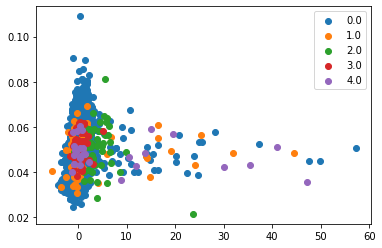

In [42]:
cols = [0, 140]
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    pyplot.scatter(X[row_ix, cols[0]], X[row_ix, cols[1]], label=str(label))
pyplot.legend()
pyplot.show()

### Combination of SMOTE and Tomek Links Undersampling

SMOTE is an oversampling method that synthesizes new plausible examples in the minority class.

Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

In [51]:
from imblearn.combine import SMOTETomek
# define resampling
resample = SMOTETomek()
# transform the dataset
under_X, under_y = resample.fit_resample(X, y)

Counter({4.0: 10000, 2.0: 9999, 3.0: 9997, 1.0: 9994, 0.0: 9992})


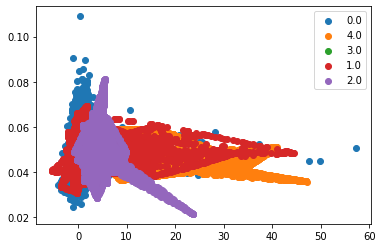

In [52]:
# summarize the new class distribution
counter = Counter(under_y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(under_y == label)[0]
    pyplot.scatter(under_X[row_ix, cols[0]], under_X[row_ix, cols[1]], label=str(label))
pyplot.legend()
pyplot.show()

### Combination of SMOTE and Edited Nearest Neighbors Undersampling

SMOTE may be the most popular oversampling technique and can be combined with many different undersampling techniques.

Another very popular undersampling method is the Edited Nearest Neighbors, or ENN, rule. This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed. It can be applied to all classes or just those examples in the majority class.

In [53]:
from imblearn.combine import SMOTEENN
# define resampling
resample = SMOTEENN()
# transform the dataset
under_X, under_y = resample.fit_resample(X, y)

Counter({4.0: 9999, 2.0: 9993, 3.0: 9967, 1.0: 9912, 0.0: 8048})


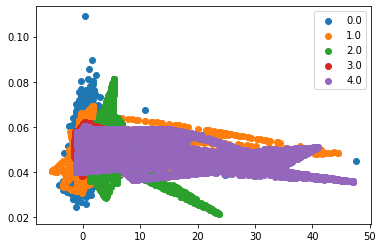

In [54]:
# summarize the new class distribution
counter = Counter(under_y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(under_y == label)[0]
    pyplot.scatter(under_X[row_ix, cols[0]], under_X[row_ix, cols[1]], label=str(label))
pyplot.legend()
pyplot.show()